In [1]:
#Importamos librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme()

In [2]:
#Cargamos el dataset
df_edx = pd.read_csv("edx_courses.csv")

## ***Análisis exploratorio***

In [3]:
df_edx.head(2)

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
0,How to Learn Online,Learn essential strategies for successful onli...,"124,980",Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,FREE-Add a Verified Certificate for $49 USD,"Designed for those who are new to elearning, t...",Welcome - We start with opportunities to meet ...,https://www.edx.org/course/how-to-learn-online
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...","293,864",Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7 Weeks,FREE-Add a Verified Certificate for $49 USD,This course aims to teach everyone the basics ...,NaN,https://www.edx.org/course/programming-for-eve...


Los tipos de datos en columna son erróneos

In [4]:
df_edx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               975 non-null    object
 1   summary             922 non-null    object
 2   n_enrolled          855 non-null    object
 3   course_type         975 non-null    object
 4   institution         975 non-null    object
 5   instructors         972 non-null    object
 6   Level               975 non-null    object
 7   subject             975 non-null    object
 8   language            975 non-null    object
 9   subtitles           972 non-null    object
 10  course_effort       975 non-null    object
 11  course_length       975 non-null    object
 12  price               975 non-null    object
 13  course_description  935 non-null    object
 14  course_syllabus     417 non-null    object
 15  course_url          975 non-null    object
dtypes: object(16)
memory usage

In [5]:
#Valores nulos
df_edx.isna().sum()

title                   0
summary                53
n_enrolled            120
course_type             0
institution             0
instructors             3
Level                   0
subject                 0
language                0
subtitles               3
course_effort           0
course_length           0
price                   0
course_description     40
course_syllabus       558
course_url              0
dtype: int64

In [6]:
#Filas y columnas
df_edx.shape

(975, 16)

In [7]:
df_edx.course_type.value_counts()

Self-paced on your time                917
Instructor-led on a course schedule     58
Name: course_type, dtype: int64

#### **Cantidad de cursos de forma sincrónica y asincrónica**

<AxesSubplot: xlabel='course_type', ylabel='count'>

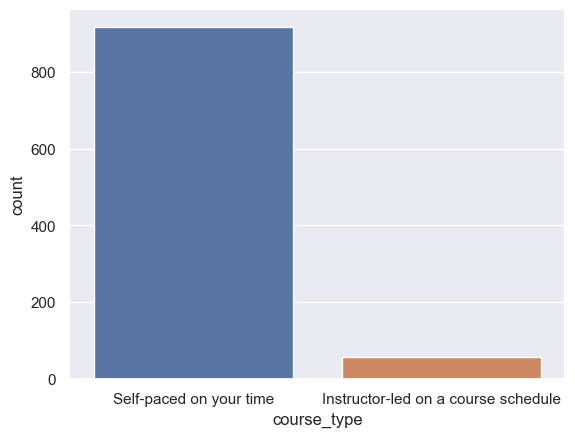

In [8]:
sns.countplot(x=df_edx.course_type)

In [9]:
df_edx.course_type.value_counts(normalize=True)

Self-paced on your time                0.940513
Instructor-led on a course schedule    0.059487
Name: course_type, dtype: float64

Observación: El 94% de los cursos son de forma asincrónica

#### **Cantidad de cursos según nivel**

<AxesSubplot: xlabel='Level', ylabel='count'>

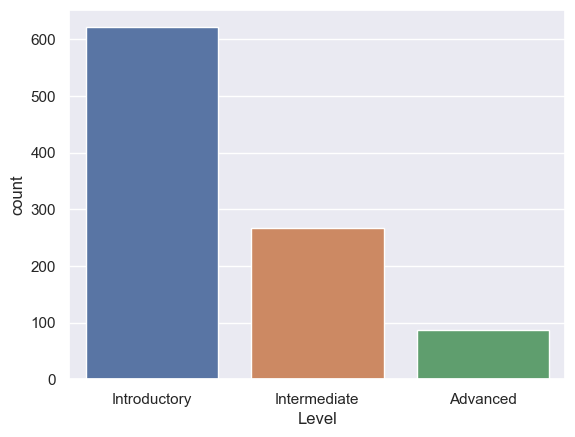

In [10]:
sns.countplot(x=df_edx["Level"])

In [11]:
df_edx["Level"].value_counts(normalize=True)

Introductory    0.636923
Intermediate    0.273846
Advanced        0.089231
Name: Level, dtype: float64

Observación: La mayoria de los cursos son introductorios (63%), los cursos intermedios conforman el 27% y los avanzados solamente el 8%

In [13]:
df_edx["language"].value_counts()

English          777
Español          176
Français           7
Italiano           4
中文                 4
Português          4
日本語                1
اللغة العربية      1
Deutsch            1
Name: language, dtype: int64

#### **Cantidad de cursos según duración**

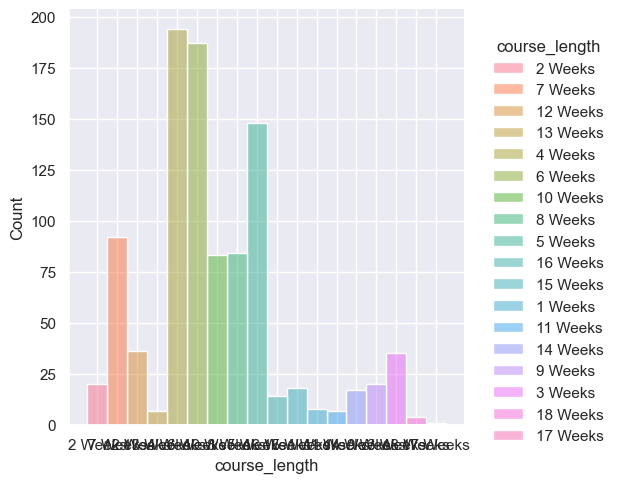

In [14]:
sns.displot(x=df_edx["course_length"], hue=df_edx["course_length"])

In [15]:
df_edx["course_length"].value_counts(normalize=True)

4 Weeks     0.198974
6 Weeks     0.191795
5 Weeks     0.151795
7 Weeks     0.094359
8 Weeks     0.086154
10 Weeks    0.085128
12 Weeks    0.036923
3 Weeks     0.035897
2 Weeks     0.020513
9 Weeks     0.020513
15 Weeks    0.018462
14 Weeks    0.017436
16 Weeks    0.014359
1 Weeks     0.008205
11 Weeks    0.007179
13 Weeks    0.007179
18 Weeks    0.004103
17 Weeks    0.001026
Name: course_length, dtype: float64

## ***Feature Engineering***

#### **`"n_enrolled"`**

"n_enrolled" = Cantidad de inscriptos

Para empezar, detectamos que la columna tiene formato de string, por lo que no podemos realizar cálculos matemáticos con ella.

In [16]:
df_edx["n_enrolled"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 975 entries, 0 to 974
Series name: n_enrolled
Non-Null Count  Dtype 
--------------  ----- 
855 non-null    object
dtypes: object(1)
memory usage: 7.7+ KB


Otra observación es que posee números con coma, por lo que debemos quitarlas

In [17]:
df_edx["n_enrolled"]

0        124,980
1        293,864
2      2,442,271
3        129,555
4         81,140
         ...    
970          NaN
971          NaN
972       11,246
973        8,775
974          NaN
Name: n_enrolled, Length: 975, dtype: object

Detectamos que la columna contiene 120 valores nulos

In [18]:
df_edx["n_enrolled"].isna().value_counts()

False    855
True     120
Name: n_enrolled, dtype: int64

**Transformación:** Voy a cambiar el tipo de dato de la columna de "object" a "Int64" ya que se trata de numeros. Le voy a quitar la coma al formato del número y rellenaré los valores faltantes con el promedio

In [19]:
#Quitamos la coma de los numeros
df_edx["n_enrolled"] = df_edx["n_enrolled"].str.replace(",", "")

In [20]:
#Cambiamos el tipo de dato de la columna
df_edx["n_enrolled"] = df_edx["n_enrolled"].astype("Int64")

Así quedo la transformación

In [21]:
df_edx["n_enrolled"]

0       124980
1       293864
2      2442271
3       129555
4        81140
        ...   
970       <NA>
971       <NA>
972      11246
973       8775
974       <NA>
Name: n_enrolled, Length: 975, dtype: Int64

Ahora reemplazamos los valores nulos con el promedio

In [22]:
#Promedio de inscriptos
promedio = round(df_edx["n_enrolled"].mean())
promedio

53260

In [23]:
#Rellenamos los valores nulos con el promedio
df_edx["n_enrolled"] = df_edx["n_enrolled"].fillna(promedio)

Así quedo sin valores nulos:

In [24]:
df_edx["n_enrolled"]

0       124980
1       293864
2      2442271
3       129555
4        81140
        ...   
970      53260
971      53260
972      11246
973       8775
974      53260
Name: n_enrolled, Length: 975, dtype: Int64

In [25]:
df_edx

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
0,How to Learn Online,Learn essential strategies for successful onli...,124980,Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,FREE-Add a Verified Certificate for $49 USD,"Designed for those who are new to elearning, t...",Welcome - We start with opportunities to meet ...,https://www.edx.org/course/how-to-learn-online
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...",293864,Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7 Weeks,FREE-Add a Verified Certificate for $49 USD,This course aims to teach everyone the basics ...,NaN,https://www.edx.org/course/programming-for-eve...
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,2442271,Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,12 Weeks,FREE-Add a Verified Certificate for $90 USD,"This is CS50x , Harvard University's introduct...",NaN,https://www.edx.org/course/cs50s-introduction-...
3,The Analytics Edge,"Through inspiring examples and stories, discov...",129555,Instructor-led on a course schedule,Massachusetts Institute of Technology,Dimitris Bertsimas-Allison O'Hair-John Silberh...,Intermediate,Data Analysis & Statistics,English,English,10–15 hours per week,13 Weeks,FREE-Add a Verified Certificate for $199 USD,"In the last decade, the amount of data availab...",NaN,https://www.edx.org/course/the-analytics-edge
4,Marketing Analytics: Marketing Measurement Str...,This course is part of a MicroMasters® Program,81140,Self-paced on your time,"University of California, Berkeley",Stephan Sorger,Introductory,Computer Science,English,English,5–7 hours per week,4 Weeks,FREE-Add a Verified Certificate for $249 USD,Begin your journey in a new career in marketin...,NaN,https://www.edx.org/course/marketing-analytics...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970,Leaders in Citizen Security and Justice Manage...,"Learn about the latest in prevention, police a...",53260,Self-paced on your time,Inter-American Development Bank,Olga Espinoza-Eduardo Pazinato-Alejandra Mera-...,Intermediate,Social Sciences,English,English,4–5 hours per week,10 Weeks,FREE-Add a Verified Certificate for $25 USD,The high rates of crime and violence are two o...,NaN,https://www.edx.org/course/leaders-in-citizen-...
971,Pattern Studying and Making | 图案审美与创作,Fantastic experiences in beauty and its repres...,53260,Self-paced on your time,Tsinghua University,Yuehua Nie,Introductory,Art & Culture,中文,"English, 中文",3–5 hours per week,12 Weeks,FREE-Add a Verified Certificate for $139 USD,Are you an original designer? Or a DIY fancier...,NaN,https://www.edx.org/course/pattern-studying-an...
972,Computational Neuroscience: Neuronal Dynamics ...,This course explains the mathematical and comp...,11246,Self-paced on your time,École polytechnique fédérale de Lausanne,Wulfram Gerstner,Advanced,Biology & Life Sciences,English,English,4–6 hours per week,6 Weeks,FREE-Add a Verified Certificate for $139 USD,What happens in your brain when you make a dec...,Textbook: Neuronal Dynamics - from single neur...,https://www.edx.org/course/computational-neuro...
973,Cities and the Challenge of Sustainable Develo...,What is a sustainable city? Learn the basics h...,8775,Self-paced on your time,SDG Academy,Jeffrey D. Sachs,Introductory,Environmental Studies,English,English,1–2 hours per week,1 Weeks,FREE-Add a Verified Certificate for $25 USD,"According to the United Nations, urbanization ...",Module 1: Introduction to the SDGsProfessor Je...,https://www.edx.org/cour

#### **`"language"`**

"language" = idioma en el que se dicta el curso

Es una columna de tipo "object"

In [26]:
df_edx["language"]

0      English
1      English
2      English
3      English
4      English
        ...   
970    English
971         中文
972    English
973    English
974    English
Name: language, Length: 975, dtype: object

No posee valores faltantes

In [27]:
df_edx["language"].isna().value_counts()

False    975
Name: language, dtype: int64

No posee normalización de idioma

In [28]:
df_edx["language"].value_counts()

English          777
Español          176
Français           7
Italiano           4
中文                 4
Português          4
日本語                1
اللغة العربية      1
Deutsch            1
Name: language, dtype: int64

**Transformación:** Voy a reemplazar el idioma de todos los valores al inglés (Ej: Español a Spanish)

In [29]:
#Creamos un diccionario con los valores a reemplazar
diccionario = {"Español": "Spanish", "Français": "French", "Italiano": "Italian", 
                "中文": "Chinese", "Português": "Portuguese", "日本語": "Japanese", 
                "اللغة العربية": "Arabic", "Deutsch": "German"}

In [30]:
#Aplicamos la transformación
df_edx["language"] = df_edx["language"].replace(diccionario)

Verificamos que los cambios se hayan hecho bien

In [31]:
df_edx["language"].value_counts()

English       777
Spanish       176
French          7
Italian         4
Chinese         4
Portuguese      4
Japanese        1
Arabic          1
German          1
Name: language, dtype: int64

#### **`"course_length"`**

"course_length" = Duración del curso en semanas

El tipo de dato de la columna es object

In [32]:
df_edx["course_length"]

0       2 Weeks
1       7 Weeks
2      12 Weeks
3      13 Weeks
4       4 Weeks
         ...   
970    10 Weeks
971    12 Weeks
972     6 Weeks
973     1 Weeks
974     4 Weeks
Name: course_length, Length: 975, dtype: object

No posee valores faltantes

In [33]:
df_edx["course_length"].isna().value_counts()

False    975
Name: course_length, dtype: int64

Valores disponibles

In [34]:
df_edx["course_length"].value_counts()

4 Weeks     194
6 Weeks     187
5 Weeks     148
7 Weeks      92
8 Weeks      84
10 Weeks     83
12 Weeks     36
3 Weeks      35
2 Weeks      20
9 Weeks      20
15 Weeks     18
14 Weeks     17
16 Weeks     14
1 Weeks       8
11 Weeks      7
13 Weeks      7
18 Weeks      4
17 Weeks      1
Name: course_length, dtype: int64

**Transformación:** Voy modificar el tipo de dato de "Object" a "Int64". Ya que todos los valores se refieren a semanas, voy a eliminar "weeks" y dejar únicamente el valor numérico ya que permite realizar funciones de agregación

In [4]:
#Aplicamos la transformación para cada registro
for i in range(len(df_edx)):
    df_edx["course_length"][i] = int(df_edx["course_length"][i].split()[0])

In [5]:
#Cambiamos el tipo de dato de la columna
df_edx["course_length"] = df_edx["course_length"].astype("Int64")

Verificamos que los cambios se hayan hecho bien

In [37]:
df_edx["course_length"].value_counts()

4     194
6     187
5     148
7      92
8      84
10     83
12     36
3      35
2      20
9      20
15     18
14     17
16     14
1       8
11      7
13      7
18      4
17      1
Name: course_length, dtype: Int64

#### **`"price"`**

"price" = precio del curso en USD

In [38]:
df_edx["price"]

0       FREE-Add a Verified Certificate for $49 USD
1       FREE-Add a Verified Certificate for $49 USD
2       FREE-Add a Verified Certificate for $90 USD
3      FREE-Add a Verified Certificate for $199 USD
4      FREE-Add a Verified Certificate for $249 USD
                           ...                     
970     FREE-Add a Verified Certificate for $25 USD
971    FREE-Add a Verified Certificate for $139 USD
972    FREE-Add a Verified Certificate for $139 USD
973     FREE-Add a Verified Certificate for $25 USD
974     FREE-Add a Verified Certificate for $79 USD
Name: price, Length: 975, dtype: object

No posee valores faltantes

In [39]:
df_edx["price"].isna().value_counts()

False    975
Name: price, dtype: int64

In [40]:
df_edx["price"].value_counts()

FREE-Add a Verified Certificate for $49 USD        270
FREE-Add a Verified Certificate for $99 USD        137
FREE-Add a Verified Certificate for $50 USD         96
FREE-Add a Verified Certificate for $199 USD        85
FREE-Add a Verified Certificate for $149 USD        78
FREE-Add a Verified Certificate for $25 USD         49
FREE-Add a Verified Certificate for $139 USD        33
FREE-Add a Verified Certificate for $150 USD        30
FREE-Add a Verified Certificate for $249 USD        26
FREE-Add a Verified Certificate for $79 USD         21
FREE-Add a Verified Certificate for $169 USD        19
FREE-Add a Verified Certificate for $29 USD         15
FREE-Add a Verified Certificate for $39 USD         13
FREE-Add a Verified Certificate for $299 USD         9
FREE-Add a Verified Certificate for $129 USD         9
FREE-Add a Verified Certificate for $125 USD         8
FREE-Add a Verified Certificate for $5 USD           7
FREE-Add a Verified Certificate for $59 USD          7
FREE-Add a

In [41]:
df_edx["price"].str.startswith("FREE").count()

975

Verificamos que todos los cursos son gratuitos y que lo único que varía es el precio del certificado

**Transformación:** Decido crear una columna llamada `"certificate_price"` que solamente contenga el precio de la certificación en USD

In [42]:
#Creo la nueva columna y copio los registros de la columna price
df_edx["certificate_price"] = df_edx["price"]

In [6]:
#Aplicamos la transformación
for i in range(len(df_edx)):
    df_edx["certificate_price"][i] = df_edx["certificate_price"][i].split()[5][1:]

KeyError: 'certificate_price'

In [44]:
#Cambiamos el tipo de dato de la columna
df_edx["certificate_price"] = df_edx["certificate_price"].astype("float64")

Verificamos que los cambios se hayan hecho bien

In [45]:
df_edx["certificate_price"]

0       49.0
1       49.0
2       90.0
3      199.0
4      249.0
       ...  
970     25.0
971    139.0
972    139.0
973     25.0
974     79.0
Name: certificate_price, Length: 975, dtype: float64

### **`"course_effort"`**

"course_effort" = Tiempo estimado en horas que se le debe dedicar al curso

In [46]:
df_edx["course_effort"]

0        2–3 hours per week
1        2–4 hours per week
2       6–18 hours per week
3      10–15 hours per week
4        5–7 hours per week
               ...         
970      4–5 hours per week
971      3–5 hours per week
972      4–6 hours per week
973      1–2 hours per week
974      3–6 hours per week
Name: course_effort, Length: 975, dtype: object

No posee valores faltantes

In [47]:
df_edx["course_effort"].isna().value_counts()

False    975
Name: course_effort, dtype: int64

**Transformación:** Voy a convertir el tipo de dato de la columna en "float64". Además voy a crear un promedio entre el rango de horas estimadas y eliminar el texto. Ej: "2-4 hours per week" pasa a ser "3"

In [7]:
#Aplicamos la transformación
for i in range(len(df_edx)):
    lista = df_edx["course_effort"][i].split()[0].split(sep="–")
    promedio = (int(lista[0]) + int(lista[1])) / 2
    df_edx["course_effort"][i] = promedio

C:\Users\Administrador\AppData\Local\Temp\ipykernel_8860\3747206718.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_edx["course_effort"][i] = promedio


In [49]:
#Cambiamos el tipo de dato de la columna
df_edx["course_effort"] = df_edx["course_effort"].astype("float64")

Verificamos que los cambios se hayan hecho bien

In [50]:
df_edx["course_effort"]

0       2.5
1       3.0
2      12.0
3      12.5
4       6.0
       ... 
970     4.5
971     4.0
972     5.0
973     1.5
974     4.5
Name: course_effort, Length: 975, dtype: float64

#### ***Así nos quedó el dataframe***

In [51]:
df_edx.head(2)

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url,certificate_price
0,How to Learn Online,Learn essential strategies for successful onli...,124980,Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2.5,2,FREE-Add a Verified Certificate for $49 USD,"Designed for those who are new to elearning, t...",Welcome - We start with opportunities to meet ...,https://www.edx.org/course/how-to-learn-online,49.0
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...",293864,Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,3.0,7,FREE-Add a Verified Certificate for $49 USD,This course aims to teach everyone the basics ...,NaN,https://www.edx.org/course/programming-for-eve...,49.0


## **EDA1**

In [52]:
df_edx.head(2)

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url,certificate_price
0,How to Learn Online,Learn essential strategies for successful onli...,124980,Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2.5,2,FREE-Add a Verified Certificate for $49 USD,"Designed for those who are new to elearning, t...",Welcome - We start with opportunities to meet ...,https://www.edx.org/course/how-to-learn-online,49.0
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...",293864,Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,3.0,7,FREE-Add a Verified Certificate for $49 USD,This course aims to teach everyone the basics ...,NaN,https://www.edx.org/course/programming-for-eve...,49.0


#### **Cantidad de cursos de forma sincrónica y asincrónica**

<AxesSubplot: xlabel='course_type', ylabel='count'>

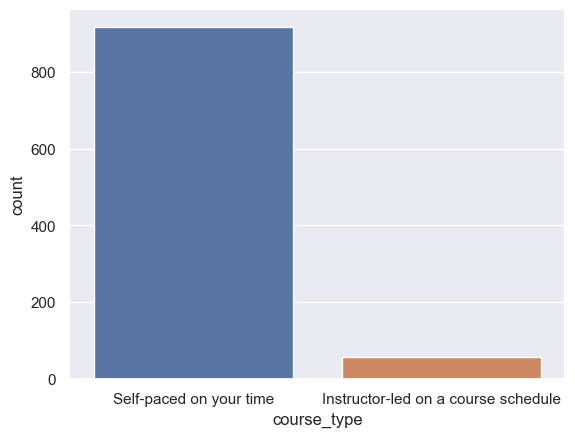

In [53]:
fig, ax = plt.subplots()
sns.countplot(x=df_edx.course_type, ax=ax)

In [54]:
df_edx.course_type.value_counts(normalize=True)

Self-paced on your time                0.940513
Instructor-led on a course schedule    0.059487
Name: course_type, dtype: float64

Observación: El 94% de los cursos son de forma asincrónica

#### **Costo promedio de certificación según tipo de cursada**

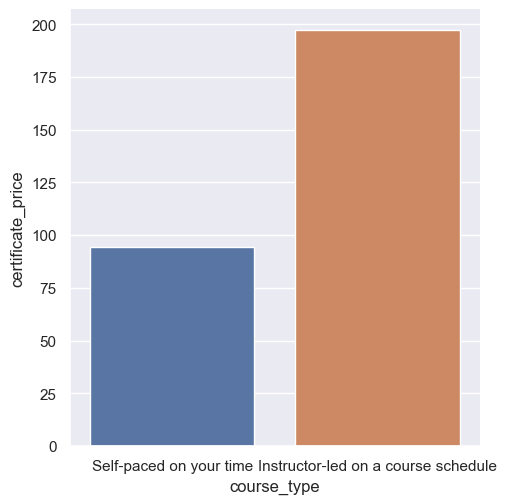

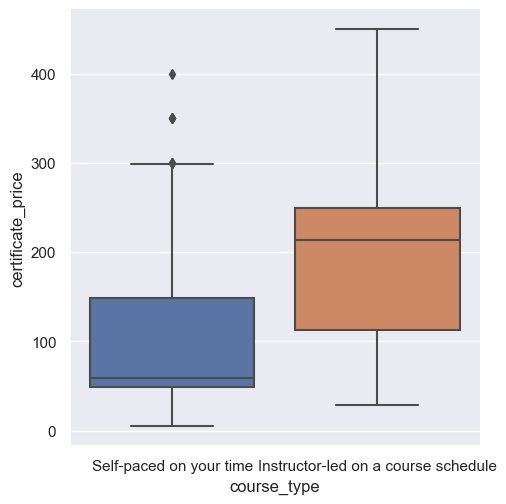

In [55]:
sns.catplot(data=df_edx, x=df_edx.course_type, y=df_edx.certificate_price, kind="bar", ci=None)
sns.catplot(data=df_edx, x=df_edx.course_type, y=df_edx.certificate_price, kind="box", ci=None)

**Observación:** En promedio, los cursos asincrónicos cuestan un 50% menos que los sincrónicos con instructor

#### **Cantidad de cursos según nivel**

<AxesSubplot: xlabel='Level', ylabel='count'>

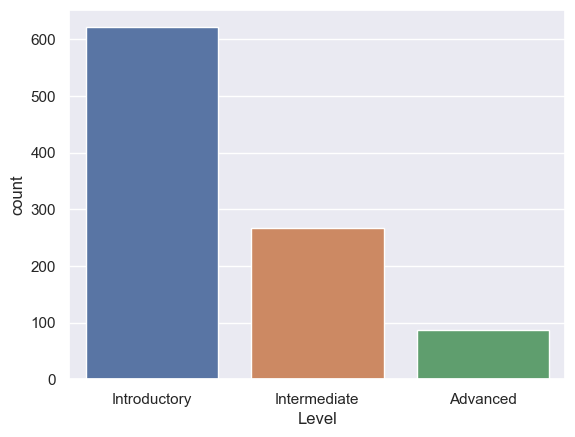

In [56]:
sns.countplot(x=df_edx["Level"])

In [57]:
df_edx["Level"].value_counts(normalize=True)

Introductory    0.636923
Intermediate    0.273846
Advanced        0.089231
Name: Level, dtype: float64

Observación: La mayoria de los cursos son introductorios (63%), los cursos intermedios conforman el 27% y los avanzados solamente el 8%

#### **Inscriptos promedio según nivel**

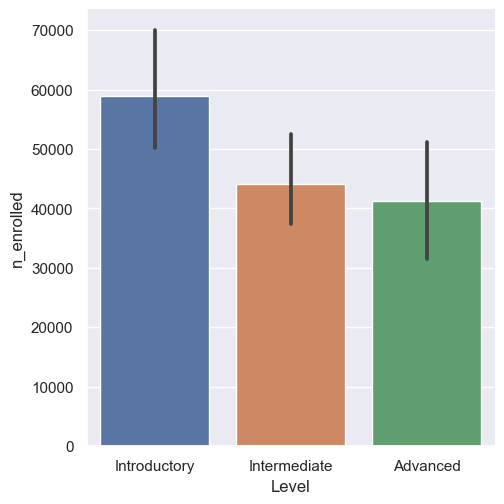

In [58]:
sns.catplot(data=df_edx, x=df_edx.Level, y=df_edx.n_enrolled, kind="bar")

**Observación:** Hay mayor cantidad de inscriptos en los cursos de nivel introductorio

#### **Inscriptos promedio según tipo de cursada**

<AxesSubplot: xlabel='course_type', ylabel='n_enrolled'>

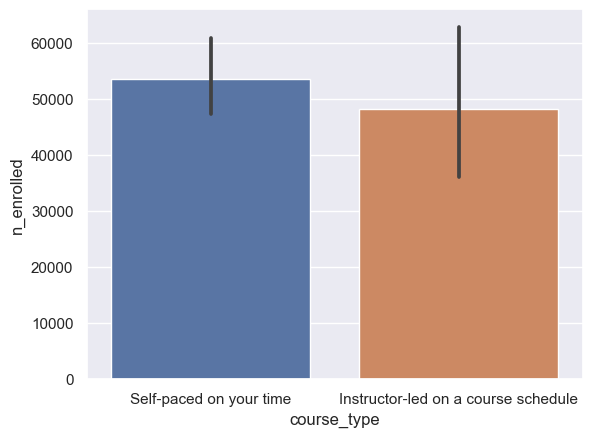

In [59]:
sns.barplot(data=df_edx, x=df_edx.course_type, y=df_edx.n_enrolled)

**Observación:** No hay una diferencia significativa de inscriptos según el tipo de cursada

#### **Costo de certificación según la duración del curso**

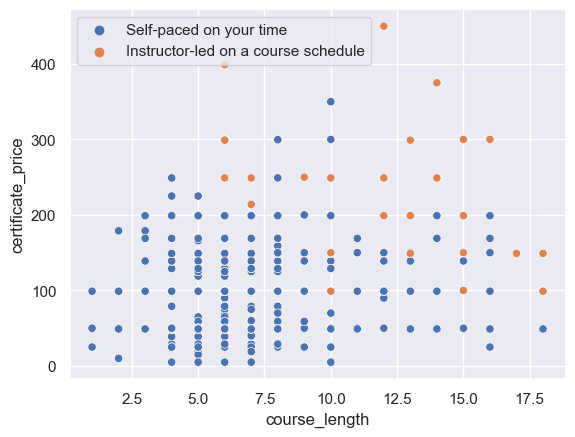

In [60]:
fig, ax = plt.subplots()
sns.scatterplot(data=df_edx, x=df_edx.course_length, y=df_edx.certificate_price, hue=df_edx.course_type)
ax.legend(loc="upper left")

**Observación:** Los cursos sincrónicos con instructor tienden a ser más largos y más caros

#### **Duración según tipo de cursada**

<AxesSubplot: xlabel='course_type', ylabel='course_length'>

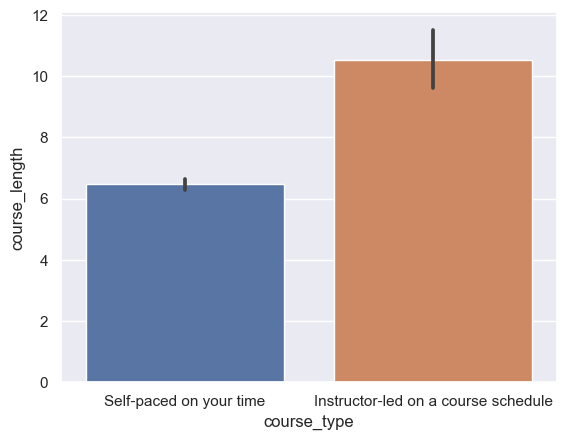

In [61]:
sns.barplot(data=df_edx, y=df_edx.course_length, x=df_edx.course_type)

**Observación:** Los cursos sincrónicos con instructor en promedio son casi el doble de largos que los asincrónicos

#### **Intensidad según tipo de cursada**

<AxesSubplot: xlabel='course_type', ylabel='course_effort'>

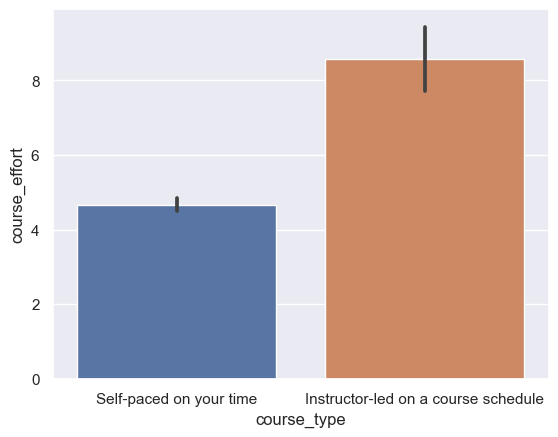

In [62]:
sns.barplot(data=df_edx, x=df_edx.course_type, y=df_edx.course_effort)

**Observación:** Los cursos sincrónicos con instructor son el doble de intensos que los asincrónicos

#### **Cantidad de cursos por idioma**

<AxesSubplot: xlabel='language', ylabel='count'>

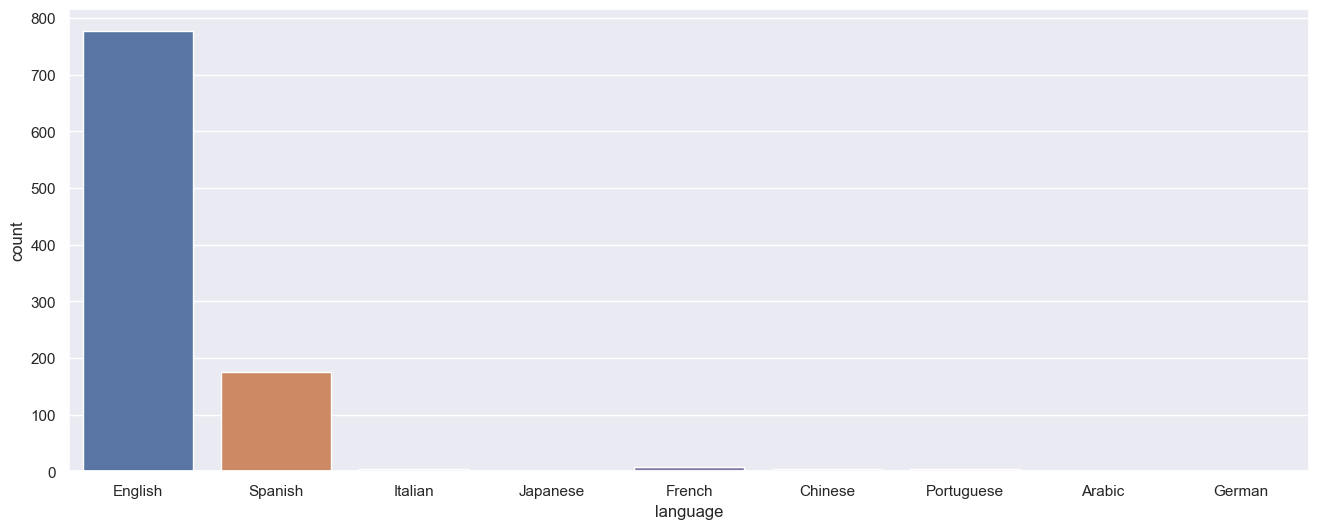

In [63]:
fig, ax = plt.subplots(figsize=(16,6))
sns.countplot(x=df_edx["language"])

In [64]:
df_edx["language"].value_counts(normalize=True)

English       0.796923
Spanish       0.180513
French        0.007179
Italian       0.004103
Chinese       0.004103
Portuguese    0.004103
Japanese      0.001026
Arabic        0.001026
German        0.001026
Name: language, dtype: float64

**Observación:** Casi el 80% de los cursos son en inglés, mientras que el 18% son en español

#### **Costo de certificación según idioma**

<AxesSubplot: xlabel='language', ylabel='certificate_price'>

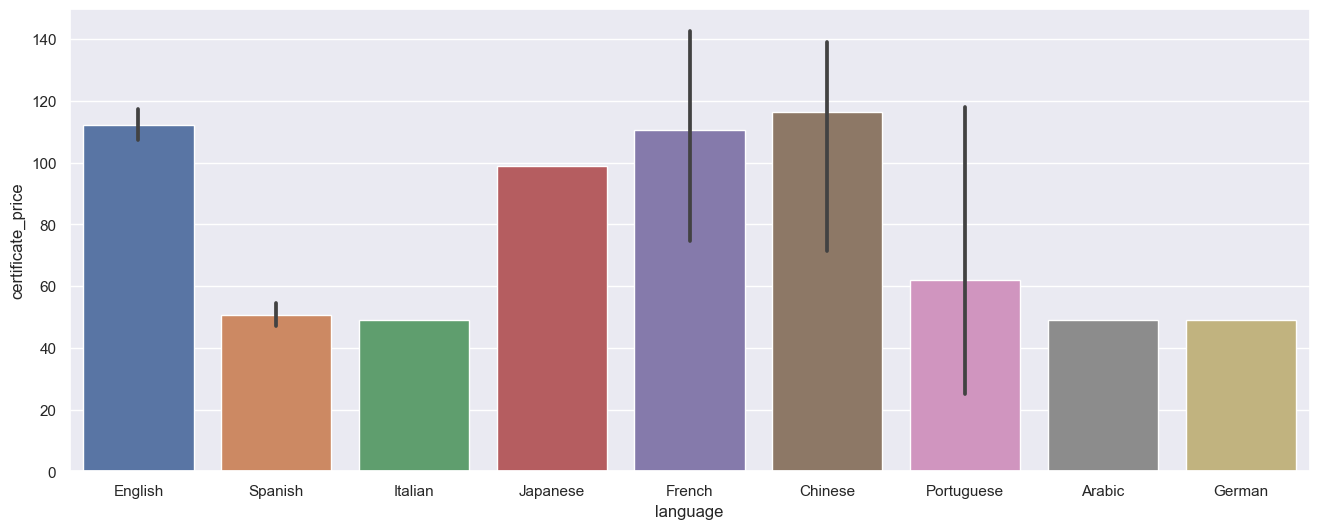

In [65]:
fig, ax = plt.subplots(figsize=(16,6))
sns.barplot(data=df_edx, x=df_edx.language, y=df_edx.certificate_price)

In [9]:
df_edx.groupby(by=["language"]).mean()

TypeError: Could not convert Lernen objekt-orientierter Programmierung to numeric

**Observación:** Teniendo en cuenta los idiomas Inglés y Español (que son los que más cursos presentan), los cursos en Español en promedio son 50% más baratos que en Inglés

#### **Cantidad promedio de inscriptos según idioma**

In [67]:
#Filtramos solamente los idiomas inglés y español
condicion = pd.concat([df_edx[df_edx.language == "Spanish"], df_edx[df_edx.language == "English"]])

[(0.0, 70000.0)]

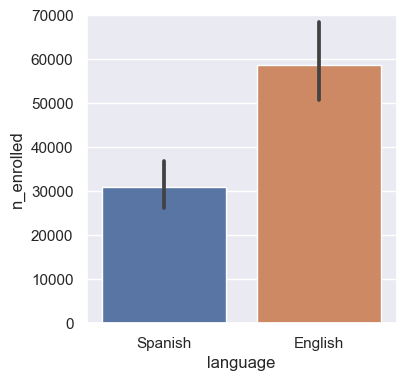

In [68]:
fig, ax = plt.subplots(figsize=(4,4))
sns.barplot(data=condicion, x="language", y="n_enrolled")
ax.set(ylim=(0,70000))

**Observación:** Los cursos en inglés poseen casi el doble de inscriptos que los cursos en español

#### **Temáticas con mayor cantidad de inscriptos**

In [10]:
#Vemos cuales son las temáticas con mayor promedio de inscriptos
df_edx.groupby(by="subject").sum().sort_values(by="n_enrolled", ascending=False)

TypeError: '<' not supported between instances of 'int' and 'str'

In [70]:
#Elegimos solamente las 8 temáticas con mayor cantidad de inscriptos
lista = ["Computer Science", "Business & Management", "Data Analysis & Statistics", 
        "Communication", "Humanities", "Social Sciences", "Engineering", "Biology & Life Science"]

condicion = df_edx.loc[df_edx["subject"].isin(lista)]

[(0.0, 15000000.0)]

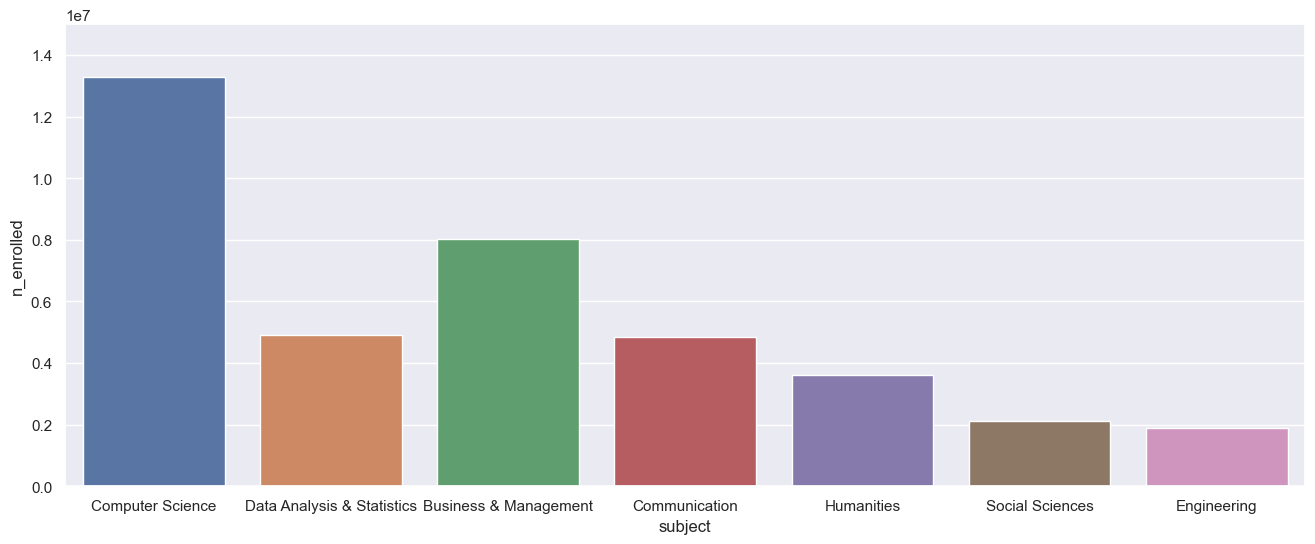

In [71]:
fig, ax = plt.subplots(figsize=(16,6))
sns.barplot(data=condicion, x="subject", y="n_enrolled", estimator=sum, 
            ci=None)
ax.set(ylim=(0,15000000))

**Observación:** La temática con mayor cantidad de inscriptos es Computer Science

## **EDA2**

In [72]:
df_edx.head(2)

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url,certificate_price
0,How to Learn Online,Learn essential strategies for successful onli...,124980,Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2.5,2,FREE-Add a Verified Certificate for $49 USD,"Designed for those who are new to elearning, t...",Welcome - We start with opportunities to meet ...,https://www.edx.org/course/how-to-learn-online,49.0
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...",293864,Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,3.0,7,FREE-Add a Verified Certificate for $49 USD,This course aims to teach everyone the basics ...,NaN,https://www.edx.org/course/programming-for-eve...,49.0


In [73]:
df_edx.shape

(975, 17)

#### **`Instituciones`**

Cantidad de instituciones diferentes con cursos

In [74]:
df_edx.institution.value_counts().count()

111

Creamos un filtro para obtener las 10 instituciones con mayor cantidad de inscriptos

In [11]:
#Creamos filtro
filtro1 = df_edx.groupby("institution").sum().sort_values(by="n_enrolled", ascending=False).iloc[:10].index

df_filtro1 = df_edx[df_edx["institution"].isin(filtro1)]

TypeError: '<' not supported between instances of 'str' and 'int'

**Top 10** Instituciones: Cantidad de cursos que ofrecen y cantidad de alumnos inscriptos

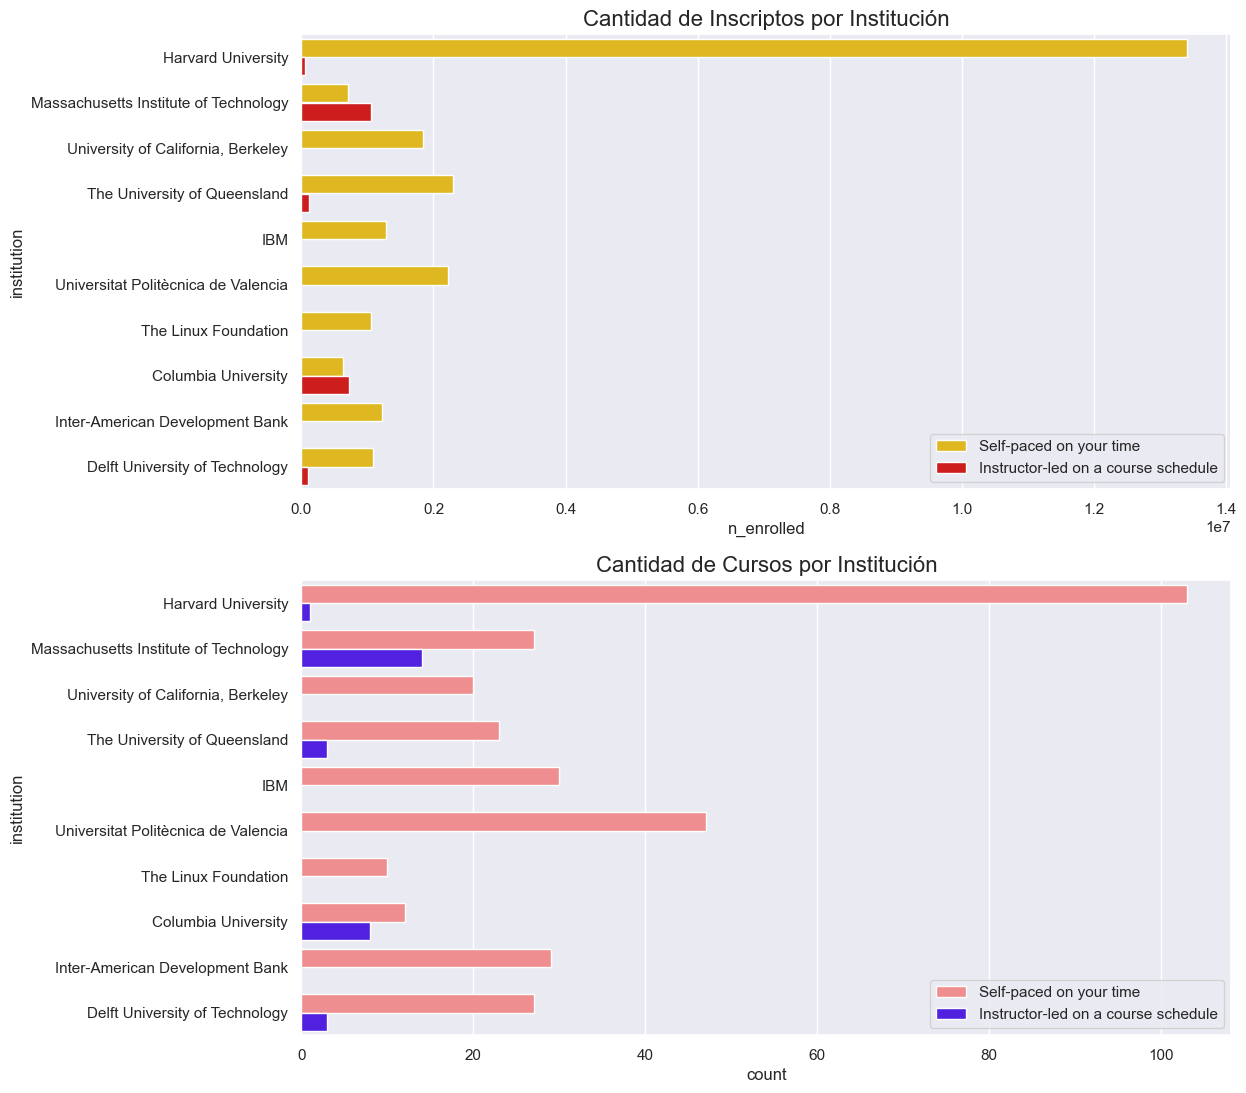

In [76]:
#Graficamos
fig, (ax1, ax2)= plt.subplots(figsize=(12,13), ncols=1, nrows=2)

ax1.set_title("Cantidad de Inscriptos por Institución", fontsize=16)
sns.barplot(data=df_filtro1, y="institution", x="n_enrolled", 
                orient="h", ci=None, estimator=sum, ax=ax1, palette="hot_r", hue="course_type")

ax2.set_title("Cantidad de Cursos por Institución", fontsize=16)
sns.countplot(data=df_filtro1, y="institution", orient="v", ax=ax2, palette="gnuplot2_r", hue="course_type")

ax2.legend(loc="lower right")
ax1.legend(loc="lower right")

***`Observaciones:`***

- Harvard University posee, por gran diferencia, más cursos y más alumnos inscriptos que el resto de instituciones.

- La mayoría de cursos son asincrónicos

**Top 10** Instituciones: Cantidad de alumnos inscriptos por promedio

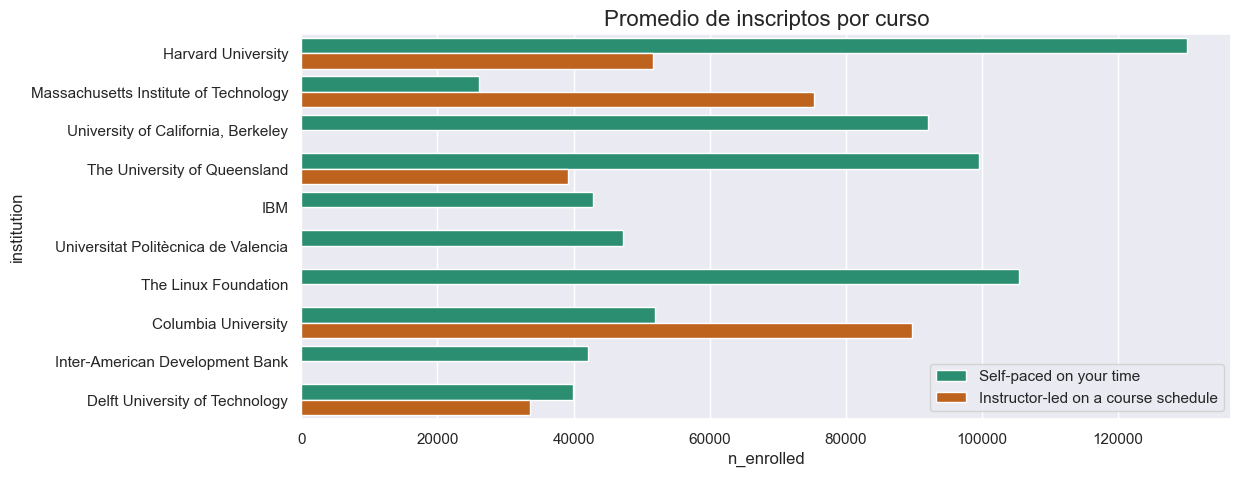

In [77]:
fig, ax= plt.subplots(figsize=(12,5))

ax.set_title("Promedio de inscriptos por curso", fontsize=16)
sns.barplot(data=df_filtro1, y="institution", x="n_enrolled", 
                orient="h", ci=None, ax=ax, palette="Dark2", hue="course_type")

ax.legend(loc="lower right")

***`Observaciones:`***

- Harvard University posee el mejor promedio de alumnos inscriptos

- El segundo mejor promedio de alumnos inscriptos lo tiene The Linux Foundation, que del top10 es el que menos cursos tiene disponibles

**Top10** Instituciones: Cuales son las más caras de certificarse?

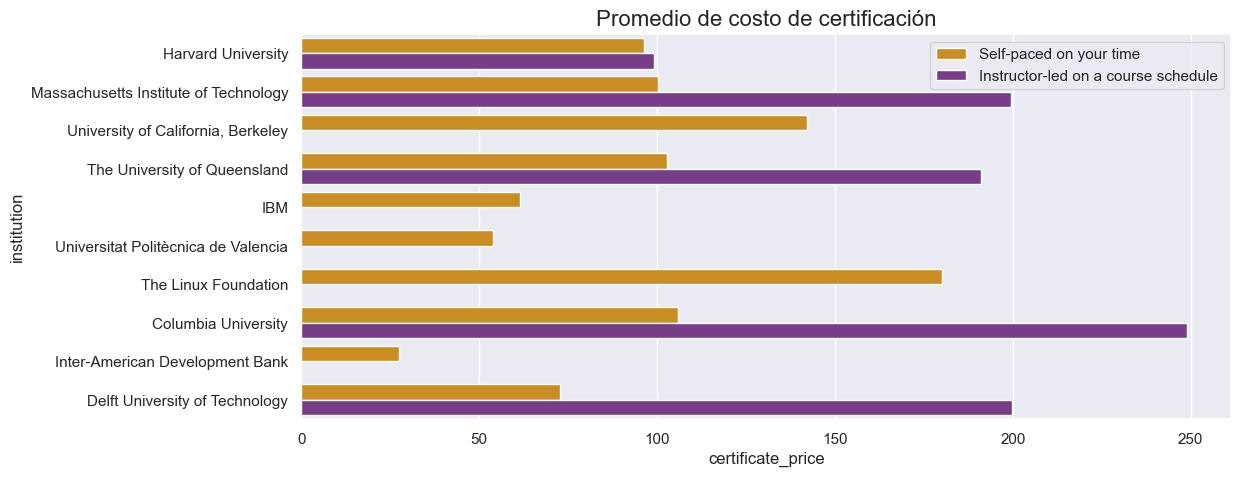

In [78]:
fig, ax= plt.subplots(figsize=(12,5))

ax.set_title("Promedio de costo de certificación", fontsize=16)
sns.barplot(data=df_filtro1, y="institution", x="certificate_price", 
                orient="h", ci=None, ax=ax, palette="CMRmap_r", hue="course_type")

ax.legend(loc="best")

***`Observaciones:`***

- Los cursos sincrónicos son mucho **más caros de certificar** que los asincrónicos

**Top10** Instituciones: Cuales instituciones tienen cursos más intensos?

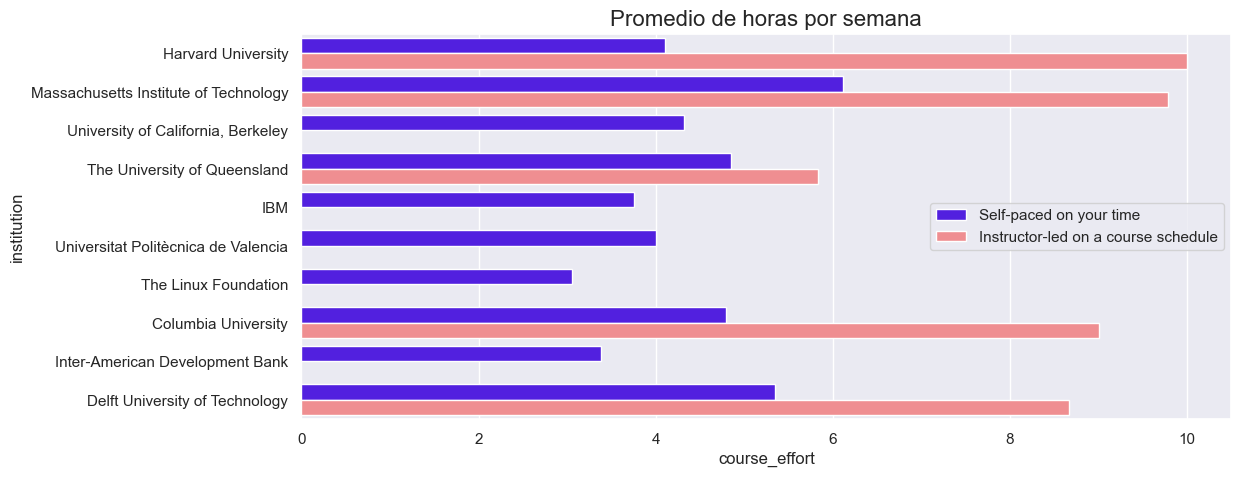

In [79]:
fig, ax= plt.subplots(figsize=(12,5))

ax.set_title("Promedio de horas por semana", fontsize=16)
sns.barplot(data=df_filtro1, y="institution", x="course_effort", 
                orient="h", ci=None, ax=ax, palette="gnuplot2", hue="course_type")

ax.legend(loc="center right")

***`Observaciones:`***

- Los cursos sincrónicos **son más intensos y requieren más horas a la semana** que los cursos asincrónicos

- MIT posee los cursos más intensos en general

**Top10** Instituciones: Cuales instituciones tienen cursos más largos?

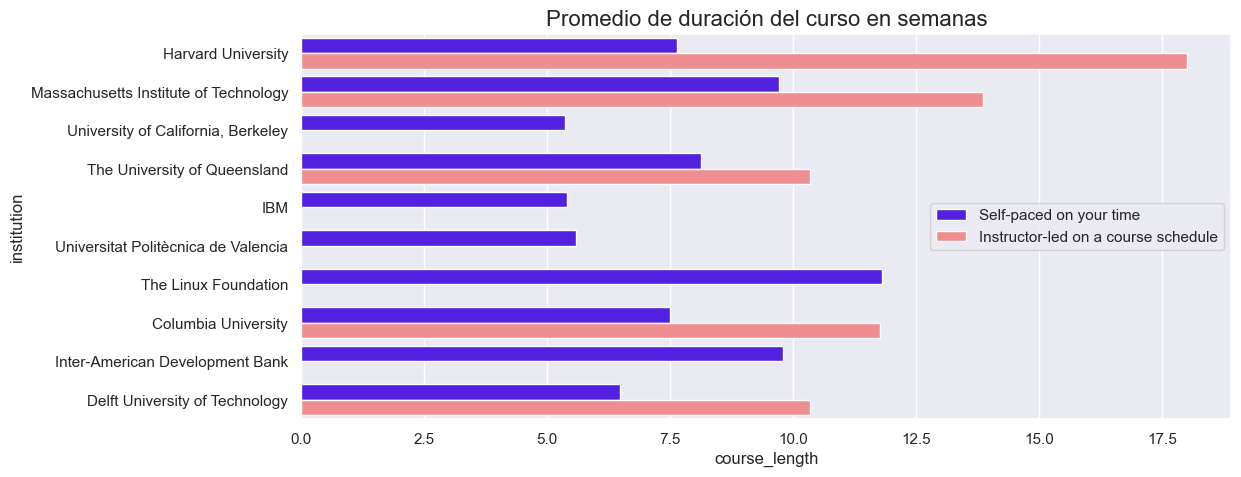

In [80]:
fig, ax= plt.subplots(figsize=(12,5))

ax.set_title("Promedio de duración del curso en semanas", fontsize=16)
sns.barplot(data=df_filtro1, y="institution", x="course_length", 
                orient="h", ci=None, ax=ax, palette="gnuplot2", hue="course_type")

ax.legend(loc="center right")

***`Observaciones:`***

- Los cursos sincrónicos **son más extensos** que los cursos asincrónicos

- Harvard University posee los cursos sincrónicos más extensos, mientras que The Linux Foundation lo es para los cursos asincrónicos

Promedio de inscriptos según temática:

In [13]:
temas = df_edx.groupby("subject").mean().sort_values("n_enrolled", ascending=False).iloc[:8].index
filtro_temas = df_edx.loc[df_edx.subject.isin(temas)]

TypeError: Could not convert The Architectural ImaginationSustainability in Architecture: An Interdisciplinary IntroductionWhat do Architects and Urban Planners do?Circular Economy for a Sustainable Built EnvironmentModern Japanese Architecture Part 1: From Meiji Restoration to the Pacific War to numeric

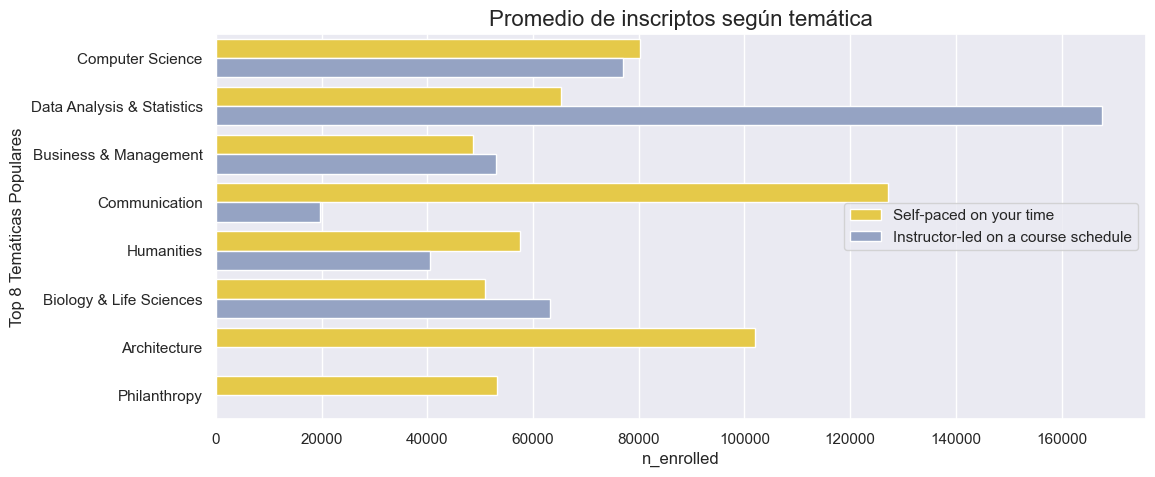

In [82]:
fig, ax= plt.subplots(figsize=(12,5))

ax.set_title("Promedio de inscriptos según temática", fontsize=16)
sns.barplot(data=filtro_temas, x="n_enrolled", y="subject", 
                orient="h", ci=None, ax=ax, palette="Set2_r", hue="course_type")
ax.set_ylabel("Top 8 Temáticas Populares")
ax.legend(loc="center right")

***`Observaciones:`***

- "Data Analysis" posee el mejor promedio de cursos sincrónicos

- "Communication" posee el mejor promedio de cursos asincrónicos, seguido de "Architecture"

Promedio de inscriptos según idioma:

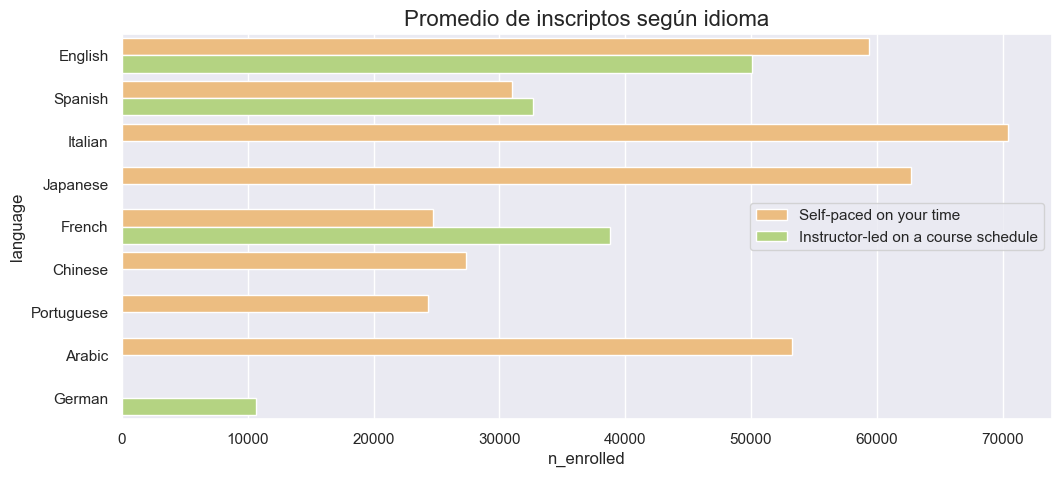

In [83]:
fig, ax= plt.subplots(figsize=(12,5))

ax.set_title("Promedio de inscriptos según idioma", fontsize=16)
sns.barplot(data=df_edx, x="n_enrolled", y="language", 
                orient="h", ci=None, ax=ax, palette="RdYlGn", hue="course_type")

ax.legend(loc="center right")

Promedio de inscriptos según nivel:

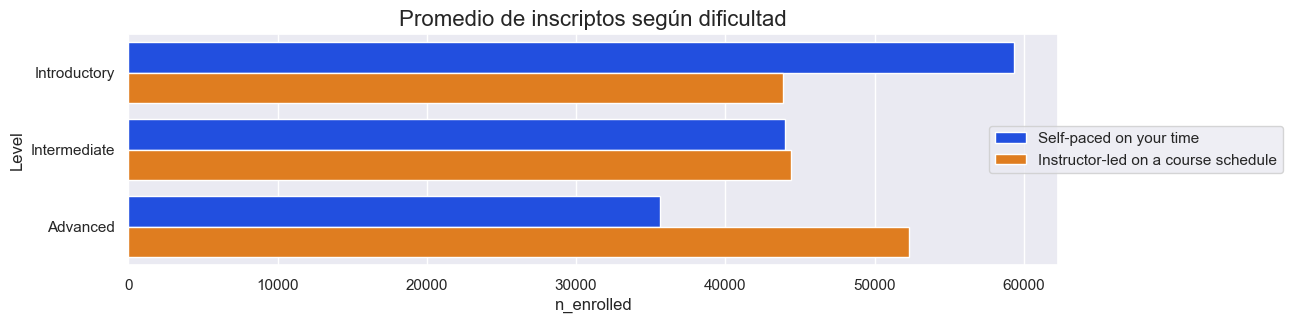

In [84]:
fig, ax= plt.subplots(figsize=(12,3))

ax.set_title("Promedio de inscriptos según dificultad", fontsize=16)
sns.barplot(data=df_edx, x="n_enrolled", y="Level", 
                orient="h", ci=None, ax=ax, palette="bright", hue="course_type")

ax.legend(loc='center right', bbox_to_anchor=(1.25, 0.5))

***`Observaciones:`***

- Si se especifica el curso como introductorio, **la gente se atreve a elegir la modalidad asincrónica y estudiar a su propio ritmo.**

- Si el curso es nivel avanzado, **los alumnos eligen la modalidad sincrónica de mano de un instructor**

Promedio de la duración de un curso según la dificultad

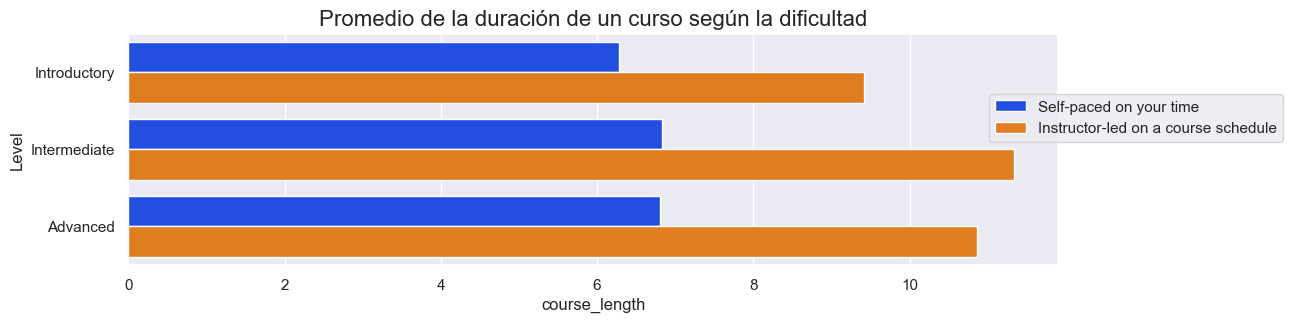

In [85]:
fig, ax= plt.subplots(figsize=(12,3))

ax.set_title("Promedio de la duración de un curso según la dificultad", fontsize=16)
sns.barplot(data=df_edx, x="course_length", y="Level", 
                orient="h", ci=None, ax=ax, palette="bright", hue="course_type")

ax.legend(loc='lower right', bbox_to_anchor=(1.25, 0.5))

***`Observaciones:`***

- Los cursos sincrónicos duran mas tiempo

Promedio de la intensidad del curso, según la dificultad:

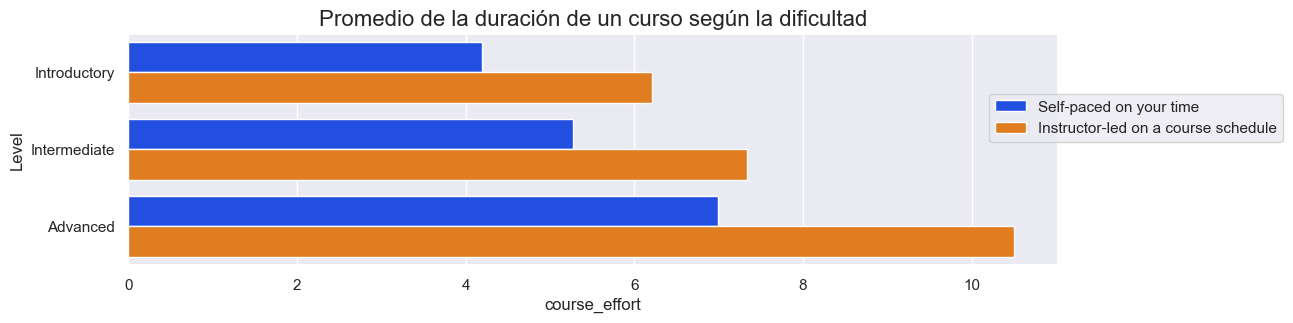

In [86]:
fig, ax= plt.subplots(figsize=(12,3))

ax.set_title("Promedio de la duración de un curso según la dificultad", fontsize=16)
sns.barplot(data=df_edx, x="course_effort", y="Level", 
                orient="h", ci=None, ax=ax, palette="bright", hue="course_type")

ax.legend(loc='lower right', bbox_to_anchor=(1.25, 0.5))

***`Observaciones:`***

- A mayor dificultad del curso, más cantidad de horas a la semana se requiere

- Los cursos sincrónicos requieren más horas a la semana

#### Si el curso está presentado por una universidad, cambia su precio?

In [87]:
df_edx["institution"]= df_edx["institution"].str.lower()

In [88]:
df_univ = df_edx.loc[df_edx["institution"].str.contains("university|universidad|universität|l'universitè|Università")]

In [12]:
lista_uni = df_univ.index

df_edx["is_university"] = df_edx["institution"]

for i, v in df_edx.iterrows():
    if i in lista_uni:
        df_edx["is_university"][i] = 1
    else:
        df_edx["is_university"][i] = 0

NameError: name 'df_univ' is not defined

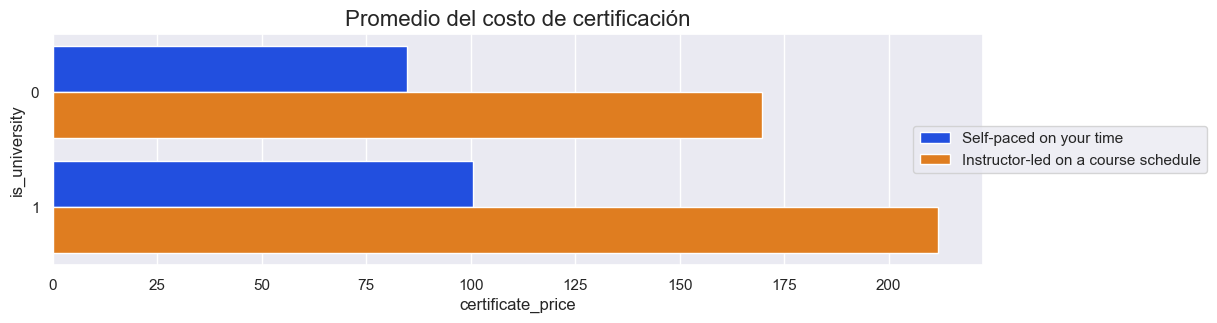

In [91]:
fig, ax= plt.subplots(figsize=(12,3))

ax.set_title("Promedio del costo de certificación", fontsize=16)
sns.barplot(data=df_edx, y="is_university", x="certificate_price", 
                orient="h", ci=None, ax=ax, palette="bright", hue="course_type")

ax.legend(loc='center right', bbox_to_anchor=(1.25, 0.5))

***`Observaciones:`***

- Si el curso es asincrónico, el precio de la certificación de una universidad cuesta un 20% más

- Si el curso es sincrónico, el precio de la certificación de una universidad cuesta un 25% más

In [93]:
#Exportamos csv
df_edx.to_csv("Dataset modificado/edx.csv")